### chenxicrypto 1.4.0 examples for use

In [1]:
'''
chenxicrypto 1.4.0 examples for use
'''
import chenxicrypto
import matplotlib.pyplot as plt

data = chenxicrypto.CryptoData()
indic = chenxicrypto.Indicator()

symbol = 'BTC-USDT'
startAt = '2022-02-27 12:00:00'
endAt = '2022-02-27 12:59:59'
interval = '1min'

#### fetch data of cryptocurrency

In [2]:
t = data.time(startAt, endAt, interval)

opening_price = data.opening(symbol, startAt, endAt, interval)

closing_price = data.close(symbol, startAt, endAt, interval)

highest = data.high(symbol, startAt, endAt, interval)

lowest = data.low(symbol, startAt, endAt, interval)

volume = data.volume(symbol, startAt, endAt, interval)

amount = data.amount(symbol, startAt, endAt, interval)

#print(t, opening_price, closing_price, highest, lowest, volume, amount, sep = '\n\n')

#### indicators

In [3]:
# Rise or Fall
rof = indic.ROF(volume)
print(rof)

[0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0]


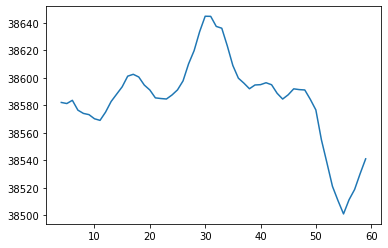

In [4]:
# Moving Average
ma5 = indic.MA(closing_price, 5)
plt.plot(ma5)

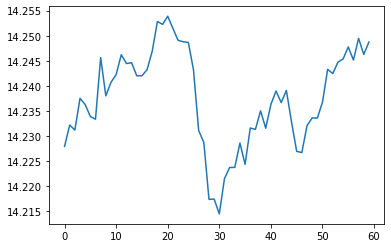

In [5]:
# Relative Strength
btc = data.close('BTC-USDT', startAt, endAt, interval)
eth = data.close('ETH-USDT', startAt, endAt, interval)
rs = indic.RS(btc, eth)
plt.plot(rs)

#### simulation

profit of your strategy: -0.0073860173699929876
buy-and-stay profit: -0.0005599670241640949
commission cost rate: 0.00797347052197016


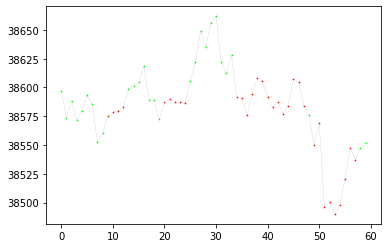

In [6]:
'''
This is an example of how to use the Simulation module.
'''

class Simul(chenxicrypto.Simulation):
    def __init__(self):
        super(Simul, self).__init__()
        
        # information that you must give
        self.priceList = data.close(symbol, startAt, endAt, interval)
        #self.timeList = data.timeStamp(startAt, endAt, interval)

        # information that you need while rewriting buy/sell signal function
        # in this example, we need moving average(k = 5, 10) of close price
        self.ma5 = indic.MA(self.priceList, 5)
        self.ma10 = indic.MA(self.priceList, 10)
        
        # commission rate. default=0.001. 1.2.2 feature
        self.commission = 0.001
    
    # rewrite your buy signal function, 
    # should return the percent of your cash remaining to buy stock
    def buySignal(self):
        buyPercent = 0.0
        if self.i >= 9:
            if self.ma5[self.i] < self.ma10[self.i]:
                buyPercent = 0.8
        return buyPercent

    # rewrite your sell signal function, 
    # should return the percent of your stock remaining to sell for cash
    def sellSignal(self):
        sellPercent = 0.0
        if self.i >= 9:
            if self.ma5[self.i] > self.ma10[self.i]:
                sellPercent = 1.0
        return sellPercent

    # process before/after one step. 1.2.1 feature
    def beforeStep(self):
        pass
    
    def afterStep(self):
        pass
    
simul = Simul()

# process the simulation and it will calculate total profit rate
simul.simulate()
print('profit of your strategy:', simul.profit)
print('buy-and-stay profit:', simul.simpleProfit)
print('commission cost rate:', simul.commissionCostRate)

# visualize
# color is the state after buy or sell at current time
# more red means more stock possess, as green for cash 
simul.visual()